In [10]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics import tsaplots

In [11]:
# Import train data
ne_train = pd.read_csv("../../data/ne_train.csv")
s_train = pd.read_csv("../../data/s_train.csv")

# Import test data
ne_test = pd.read_csv("../../data/ne_test.csv")
s_test = pd.read_csv("../../data/s_test.csv")

In [12]:
ne_train_transformed = pd.merge(ne_train.date, ne_train["covid_19_confirmed_cases"], 
                                left_index=True, right_index=True)
ne_test_transformed = pd.merge(ne_test.date, ne_test["covid_19_confirmed_cases"], 
                                left_index=True, right_index=True)
ne_train_transformed.set_index("date", inplace = True)
ne_test_transformed.set_index("date", inplace = True)

In [13]:
ne_test_transformed.index = pd.to_datetime(ne_test_transformed.index)

In [14]:
s_train_transformed = pd.merge(s_train.date, s_train["covid_19_confirmed_cases"], 
                                left_index=True, right_index=True)
s_test_transformed = pd.merge(s_test.date, s_test["covid_19_confirmed_cases"], 
                                left_index=True, right_index=True)
s_train_transformed.set_index("date", inplace = True)
s_test_transformed.set_index("date", inplace = True)

In [15]:
s_test_transformed.index = pd.to_datetime(ne_test_transformed.index)

## Log Transformation

In [37]:
#ne_train_transformed.covid_19_confirmed_cases = np.log(ne_train_transformed.covid_19_confirmed_cases)
s_train_transformed.covid_19_confirmed_cases = np.log(s_train_transformed.covid_19_confirmed_cases)

# Auto-ARIMA Models

## NE Model
- Performs best without log transformation
- MAE is reasonably good (399 confirmed cases) (Without log transformation)
    - Improvement from ARIMA
- Residual stats show that residual looks like white noise with normal distribution and mean close to 0
- ACF and PACF plots of residuals show barely any significant spikes for larger lags
    - Residuals are close to white noise

### With Log transformation

In [38]:
ne_auto_arima = auto_arima(ne_train_transformed, 
                           stepwise = False, 
                           start_p = 1,
                           max_p = 16,
                          start_d = 1)

In [39]:
ne_auto_arima

ARIMA(order=(2, 0, 2), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [40]:
ne_auto_arima.fit(ne_train_transformed)

ARIMA(order=(2, 0, 2), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [41]:
ne_test_pred = ne_auto_arima.predict(n_periods=len(ne_test_transformed))

In [42]:
# MAE on test set
mean_absolute_error(ne_test_transformed, np.exp(ne_test_pred))

948.2780811836174

### Without Log transformation

In [16]:
ne_auto_arima = auto_arima(ne_train_transformed, 
                           stepwise = False, 
                           start_p = 1,
                           max_p = 16,
                          start_d = 1)

In [17]:
ne_auto_arima

ARIMA(order=(2, 1, 2), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [56]:
ne_auto_arima.fit(ne_train_transformed)

ARIMA(order=(2, 1, 2), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [57]:
ne_test_pred = ne_auto_arima.predict(n_periods=len(ne_test_transformed))

In [58]:
# MAE on test set
mean_absolute_error(ne_test_transformed, ne_test_pred)

399.0094701381213

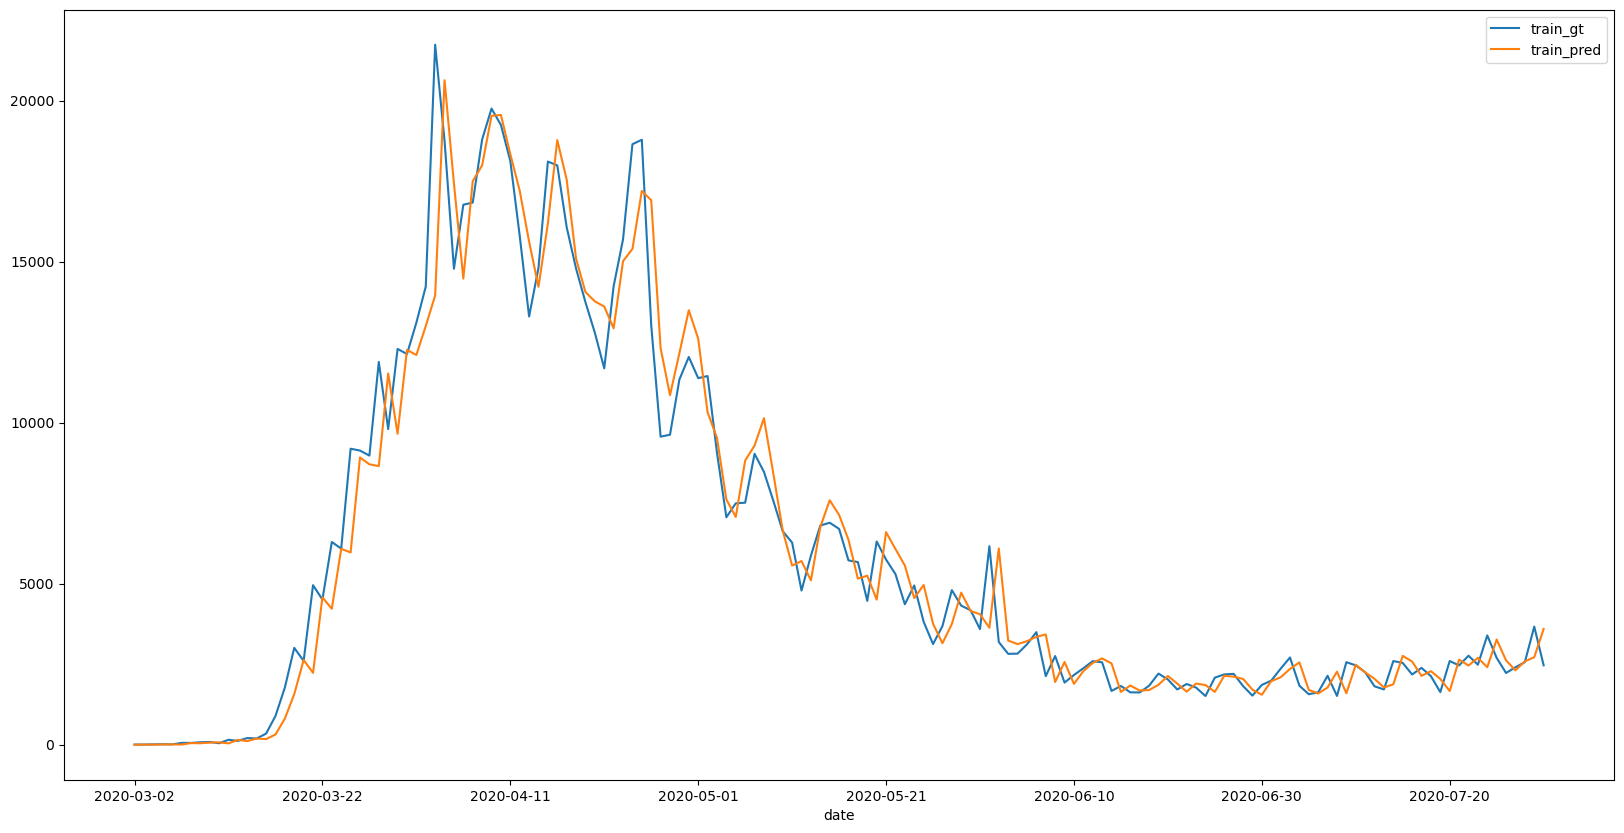

In [64]:
# Visualizing train data fitted values
ne_train_pred = ne_auto_arima.fittedvalues()
pd.concat([ne_train_transformed, ne_train_pred], axis=1).plot(figsize=(20, 10))
plt.legend(['train_gt', 'train_pred'])

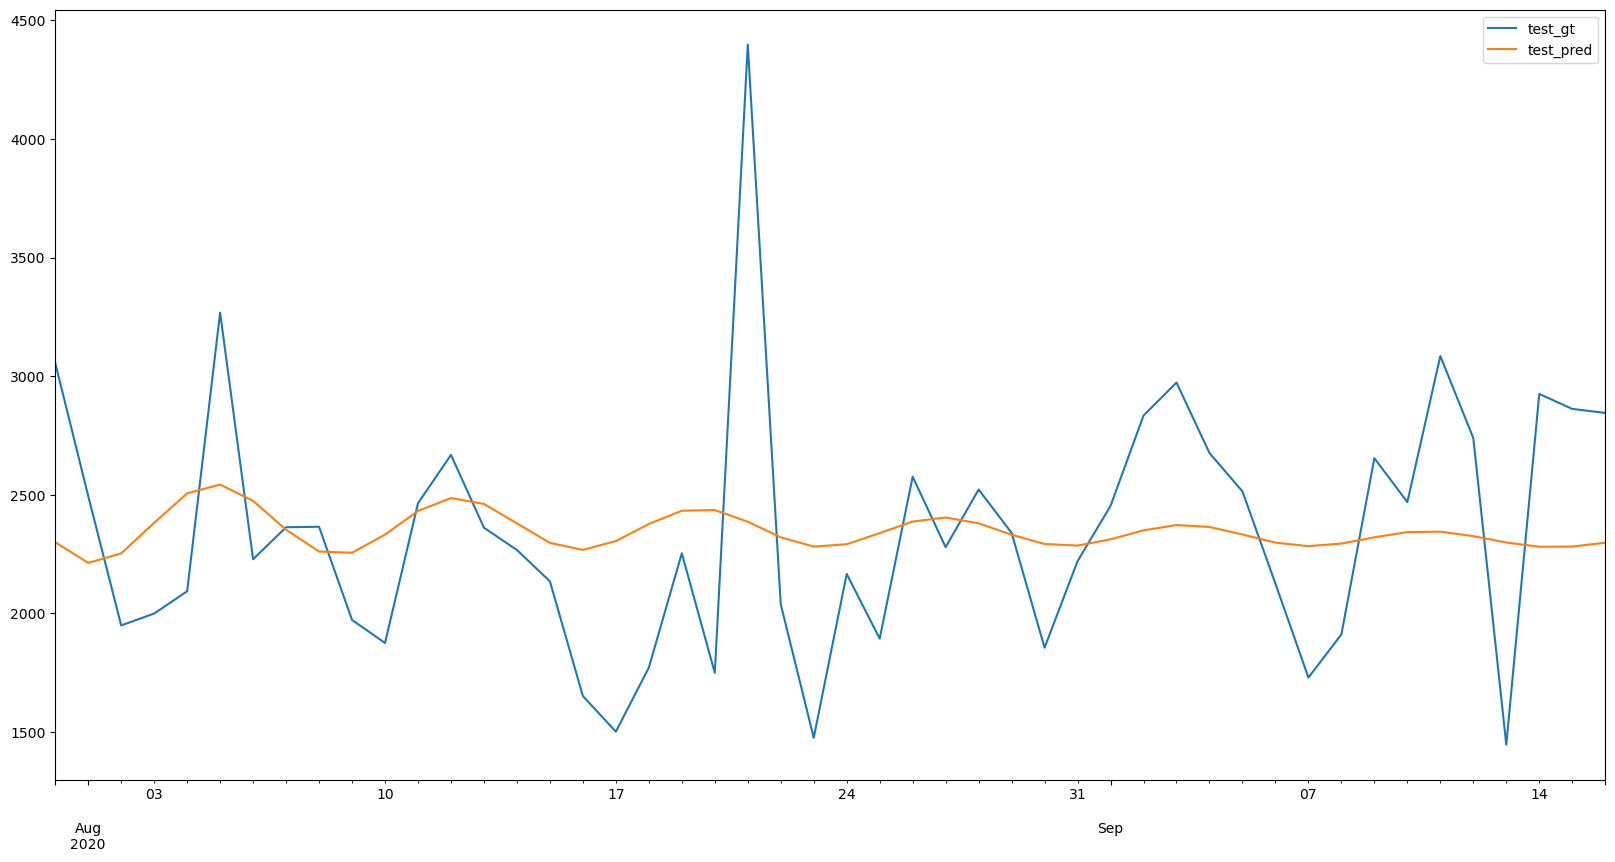

In [65]:
# Visualizing test data fitted values
pd.concat([ne_test_transformed, ne_test_pred], axis=1).plot(figsize=(20, 10))
plt.legend(['test_gt', 'test_pred'])

## S Model
- Performs much better with log transformation
- MAE is very good (3726 confirmed cases) (with log transformation)
    - Way better than ARIMA
- Model doesn't use seasonality
- Residual stats show that residual looks like white noise with normal distribution but mean not close to 0
    - Some bias in prediction
    - More bias in prediction than ARIMA
- ACF and PACF plots of residuals show barely any significant spikes for larger lags
    - Residuals are close to white noise

### With Log transformation

In [43]:
s_auto_arima = auto_arima(s_train_transformed, 
                           stepwise = False,
                          start_p = 1,
                           max_p = 16,
                          start_d = 1)

In [44]:
s_auto_arima

ARIMA(order=(0, 2, 3), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True, with_intercept=False)

In [45]:
s_auto_arima.fit(s_train_transformed)

ARIMA(order=(0, 2, 3), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True, with_intercept=False)

In [46]:
s_test_pred = s_auto_arima.predict(n_periods=len(s_test_transformed))

In [47]:
# MAE
mean_absolute_error(s_test_transformed, np.exp(s_test_pred))

3725.9110747185746

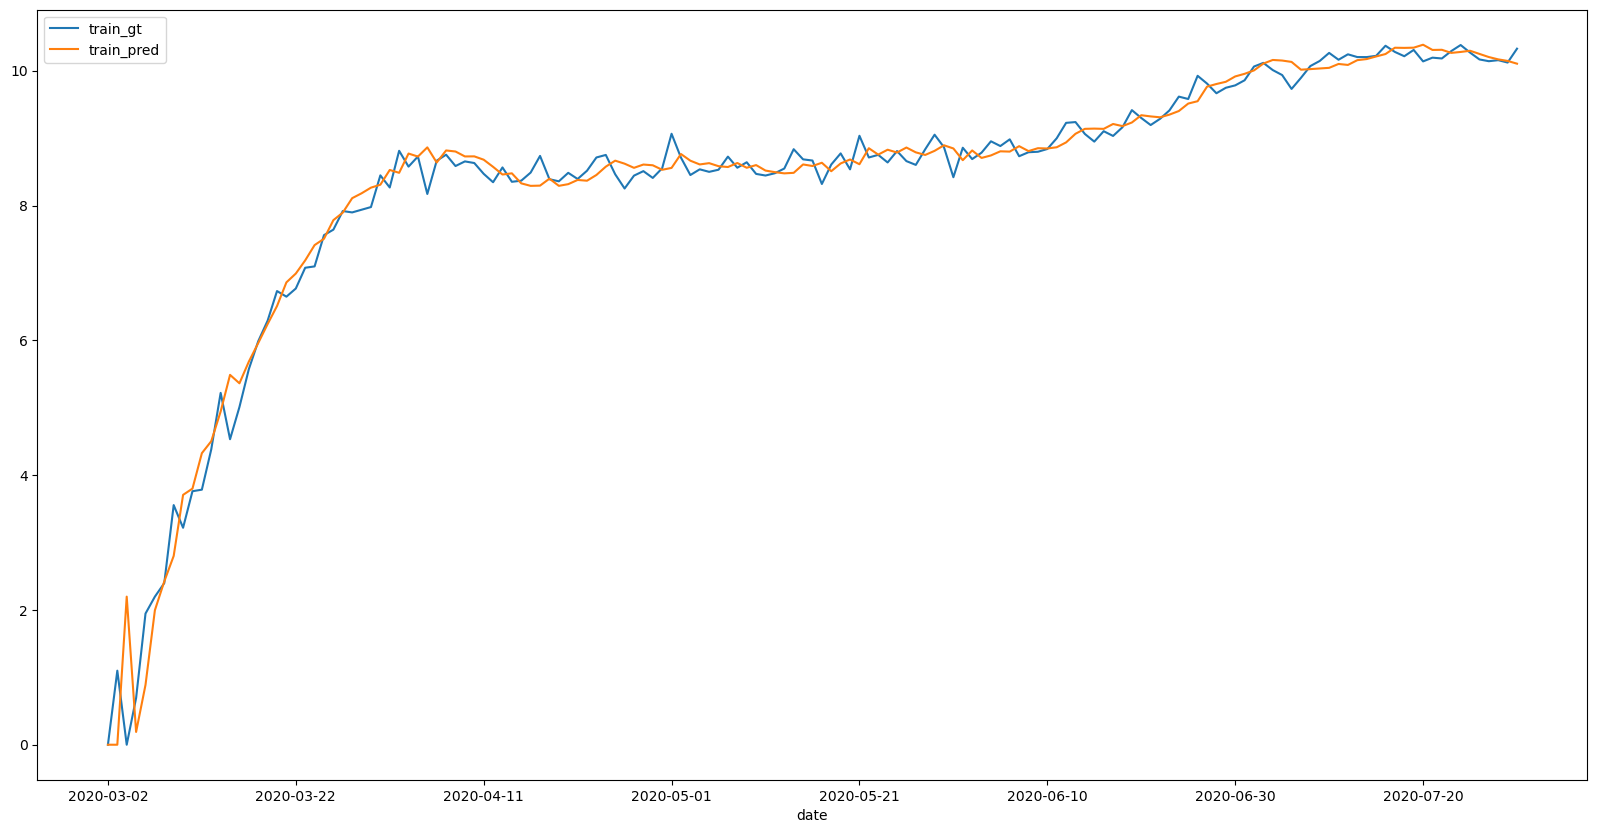

In [71]:
# Visualizing train data fitted values
s_train_pred = s_auto_arima.fittedvalues()
pd.concat([s_train_transformed, s_train_pred], axis=1).plot(figsize=(20, 10))
plt.legend(['train_gt', 'train_pred'])

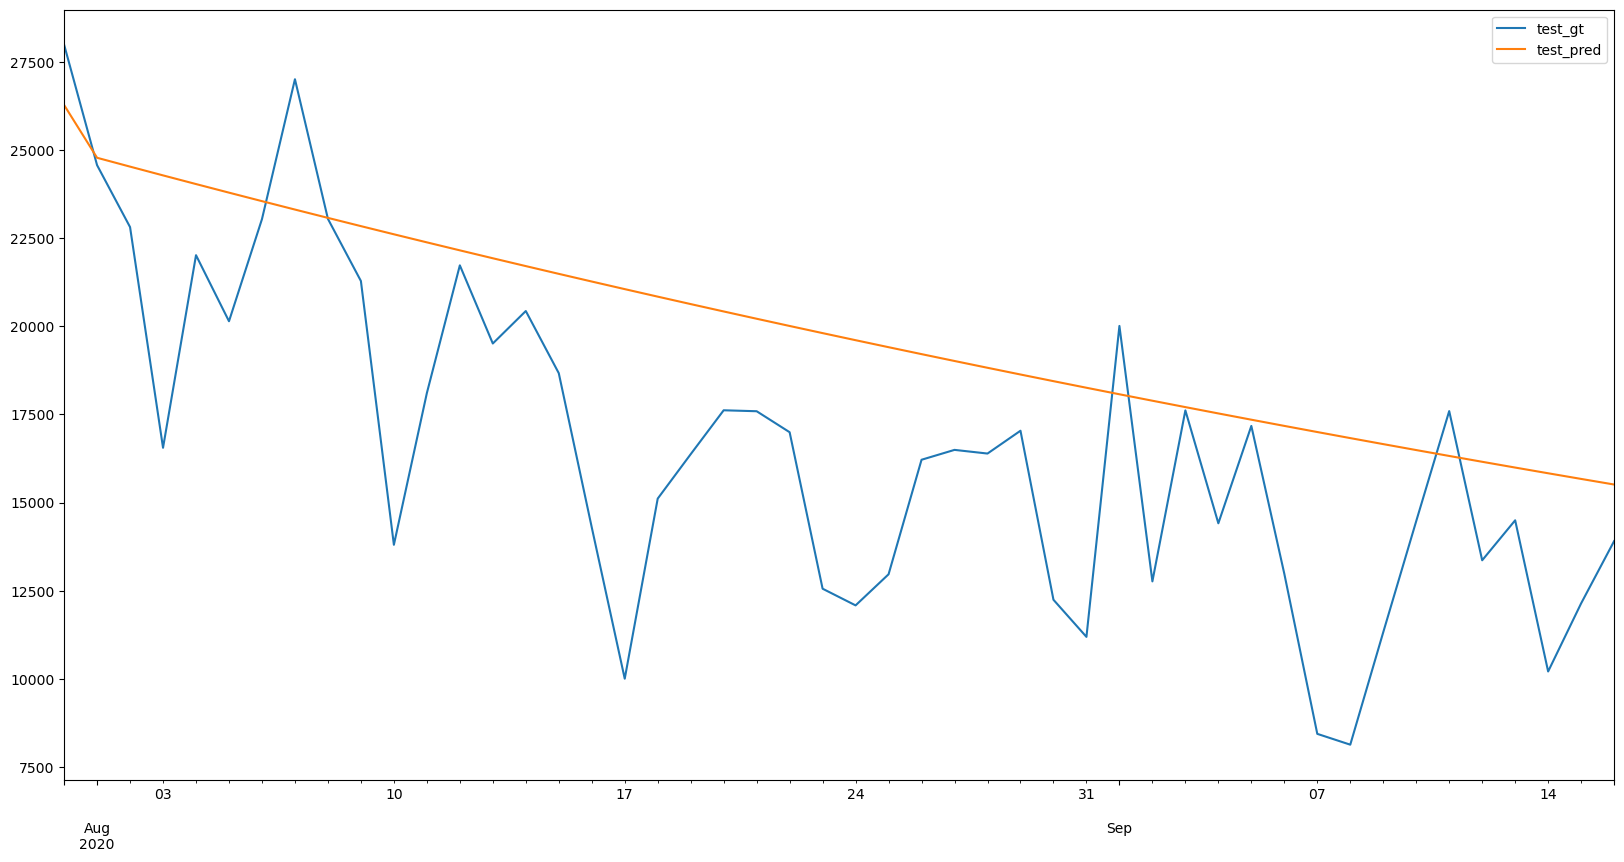

In [72]:
# Visualizing test data fitted values
pd.concat([s_test_transformed, np.exp(s_test_pred)], axis=1).plot(figsize=(20, 10))
plt.legend(['test_gt', 'test_pred'])

### Without Log transformation

In [59]:
s_auto_arima = auto_arima(s_train_transformed, 
                          stepwise = False, 
                          start_p = 1,
                           max_p = 16,
                          start_d = 1)

In [60]:
s_auto_arima

ARIMA(order=(5, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [61]:
s_auto_arima.fit(s_train_transformed)

ARIMA(order=(5, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [62]:
s_test_pred = s_auto_arima.predict(n_periods=len(s_test_transformed))

In [63]:
# MAE
mean_absolute_error(s_test_transformed, s_test_pred)

16505.6508847283

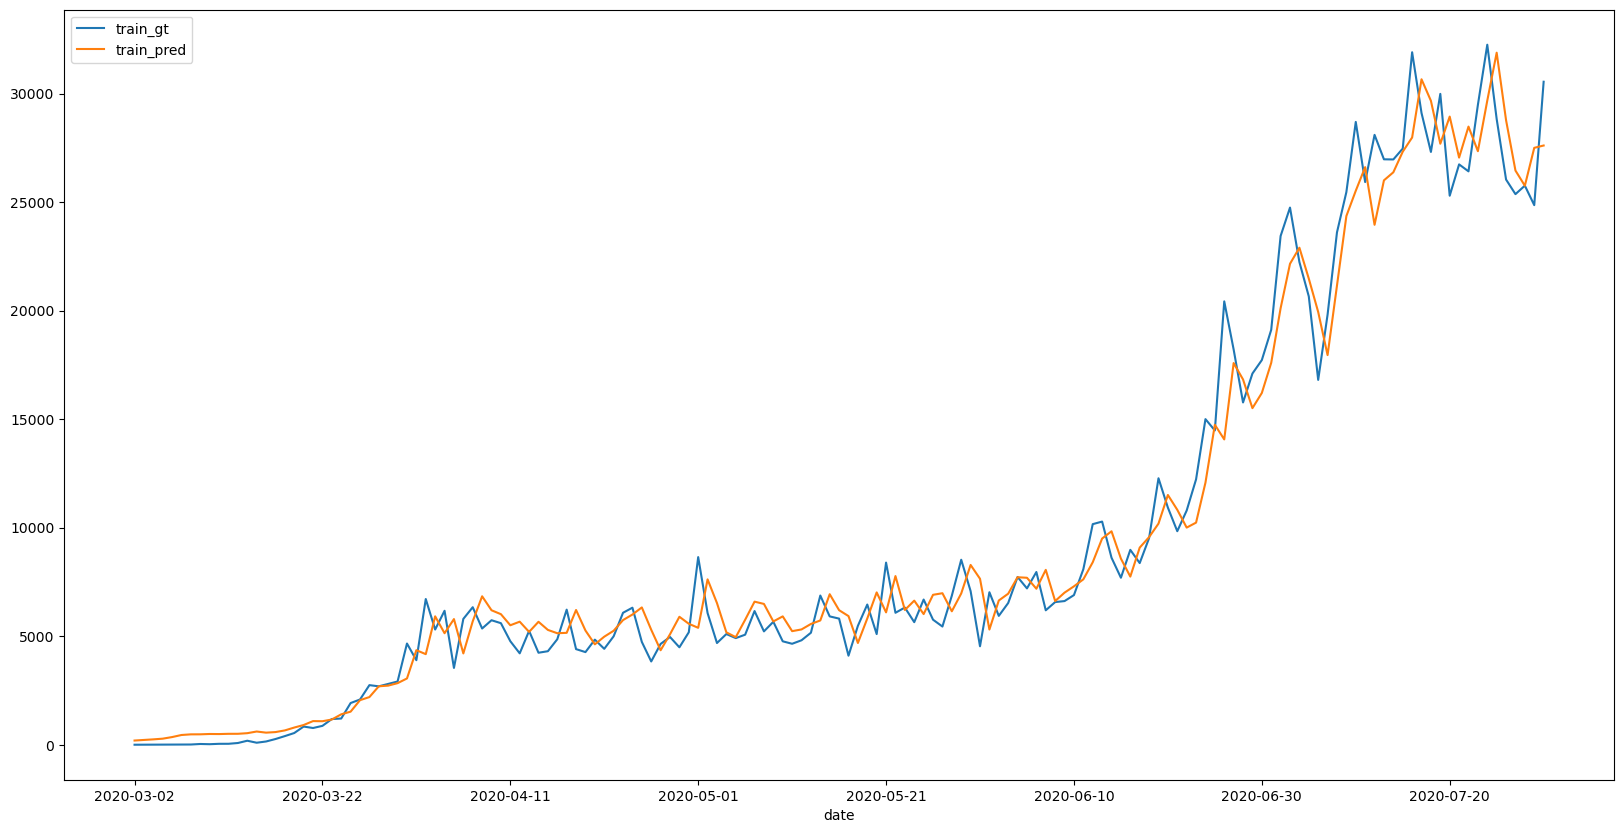

In [85]:
# Visualizing train data fitted values
s_train_pred = s_auto_arima.fittedvalues()
pd.concat([s_train_transformed, s_train_pred], axis=1).plot(figsize=(20, 10))
plt.legend(['train_gt', 'train_pred'])

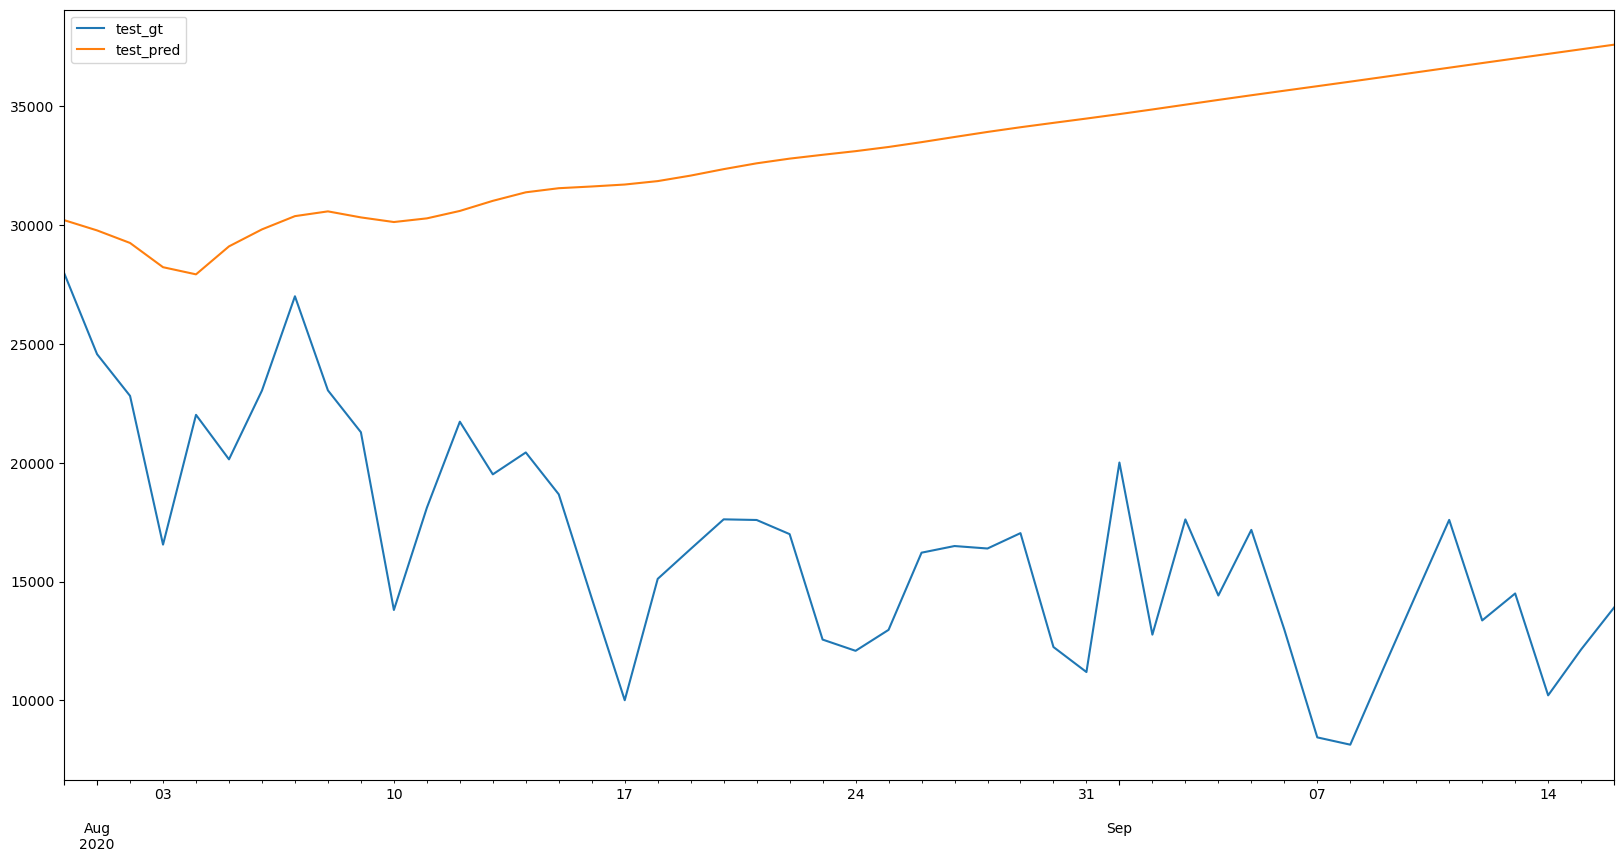

In [86]:
# Visualizing test data fitted values
pd.concat([s_test_transformed, s_test_pred], axis=1).plot(figsize=(20, 10))
plt.legend(['test_gt', 'test_pred'])